# Preliminary Analysis
This notebook showcases the preliminary data used to assess the feasibility of using trademark data as a market indicator.

In [1]:
# Import helpful modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Trademark data processing
import os, sys
sys.path.append(os.path.dirname(os.getcwd() + '/../'))
import tm_helper as tmh

## Data Sources
Number of establishments less than 1 year old
* Source: U.S. Bureau of Labor Statistics
* URL: https://www.bls.gov/bdm/entrepreneurship/bdm_chart1.htm

Historical Private sector jobs:
* Source: U.S. Bureau of Labor Statistics
* URL: https://beta.bls.gov/dataViewer/view/timeseries/CES0500000001

Historical market close data (yearly close)
* Dow Jones I.A.: https://www.macrotrends.net/1319/dow-jones-100-year-historical-chart
* NASDAQ: https://www.macrotrends.net/1320/nasdaq-historical-chart
* S&P 500: https://www.macrotrends.net/2324/sp-500-historical-chart-data

Historical number of trademarks
* Source: World intellectual property organization (WIPO)
* URL: https://www3.wipo.int/ipstats/index.htm?tab=trademark

In [2]:
# Data on the number of establishments < 1 year old
data = pd.read_csv('../data/help_files/preliminary_data.csv',
                   skipinitialspace=True)
data.describe

<bound method NDFrame.describe of     Year  Establishments < 1 yr  Trademarks Filed  \
0   1994                 569419            161055   
1   1995                 604415            188850   
2   1996                 609638            212510   
3   1997                 639114            234610   
4   1998                 643070            246611   
5   1999                 650730            260761   
6   2000                 674644            292464   
7   2001                 671383            216311   
8   2002                 659236            212638   
9   2003                 662543            221739   
10  2004                 653887            250366   
11  2005                 679925            263677   
12  2006                 715734            276110   
13  2007                 703834            303501   
14  2008                 678095            292726   
15  2009                 608769            265943   
16  2010                 560588            281462   
17  2011    

In [3]:
from scipy import stats
# Function to compute and display correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

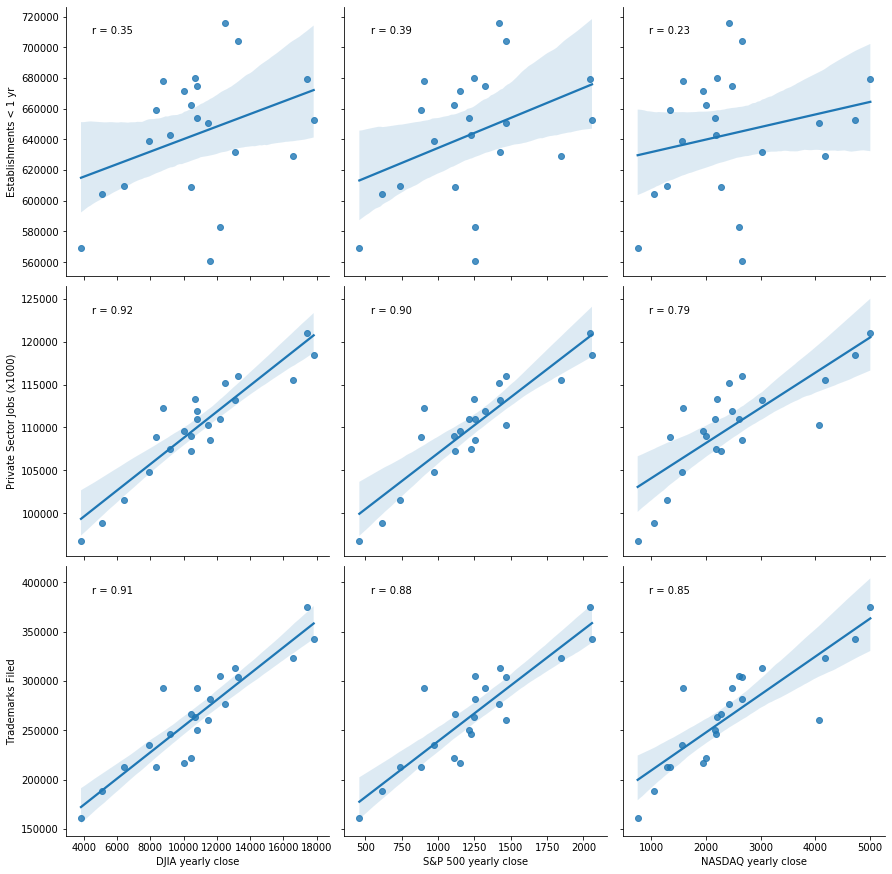

In [4]:
# Investigate the data
g = sns.pairplot(data, kind='reg',
                 x_vars=['DJIA yearly close', 'S&P 500 yearly close', 'NASDAQ yearly close'],
                 y_vars=['Establishments < 1 yr','Private Sector Jobs (x1000)','Trademarks Filed'],
                 height=4)
g.map(corrfunc)
g.savefig('../images/measure_correlations.png')

In [5]:
# Scale the data
data_scaled = pd.DataFrame()
data_scaled['Year'] = data['Year']+1

# Import a data scaler object
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

for col in data.columns:
    # Scale this column
    if col != 'Year':
        col_data = data[col].values
        data_scaled[col] = scaler.fit_transform(col_data.reshape(-1,1))

data_scaled.describe()

,Year,Establishments < 1 yr,Trademarks Filed,Private Sector Jobs (x1000),DJIA yearly close,NASDAQ yearly close,S&P 500 yearly close
count,22.000000,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01
mean,2005.500000,-1.332268e-15,5.248327e-16,3.027881e-17,-9.184572e-16,-6.257621e-16,4.642751e-16
std,6.493587,1.023533e+00,1.023533e+00,1.023533e+00,1.023533e+00,1.023533e+00,1.023533e+00
min,1995.000000,-2.065774e+00,-2.057098e+00,-2.306445e+00,-2.020057e+00,-1.531803e+00,-1.956870e+00
25%,2000.250000,-7.250474e-01,-7.983888e-01,-3.997624e-01,-5.683753e-01,-7.094520e-01,-5.808224e-01
50%,2005.500000,2.015239e-01,-1.337644e-02,8.640934e-02,-2.934840e-02,-2.018808e-01,5.713069e-03
75%,2010.750000,7.504919e-01,6.956821e-01,5.487470e-01,4.460330e-01,1.701486e-01,4.726541e-01
max,2016.000000,1.792664e+00,2.156627e+00,1.892339e+00,2.006552e+00,2.278547e+00,2.070644e+00


## Recession data
Import recession data derived from Wikipedia to show the same regions as are shown in the U.S. Bureau of Labor Statistics chart.

In [6]:
codes = tmh.TmCodes()
codes._load_recessions()
recessions = codes._recessions
recessions.head(4)

,start_year,start_month,stop_year,stop_month,description,start,stop
0,1929,8,1933,3,The Great Depression,1929.583333,1933.250000
1,1937,5,1938,6,The Roosevelt Recession,1937.333333,1938.500000
2,1945,2,1945,10,The Union Recession,1945.083333,1945.833333
3,1948,11,1949,10,The Post-War Recession,1948.833333,1949.833333


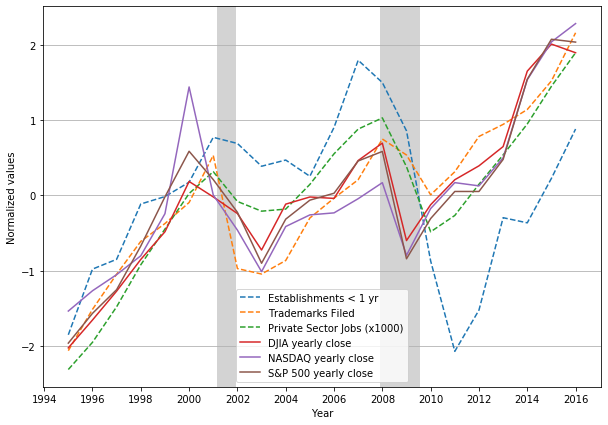

In [7]:
# Make some interesting plots
ax = data_scaled.plot(x='Year', figsize=(10,7), 
                      xticks=range(1994,2017,2),
                      style=['--','--','--'])
plt.ylabel('Normalized values')

# Create gray boxes to highlight recessions
tmh.TmDataTools().plot_recessions(ax)
ax.yaxis.grid()

# Save the image
plt.savefig('../images/trademarks_and_markets.png')

In [8]:
# Import the filings by class
col2keep = ['Nice classification']
for yr in range(2004,2018):
    col2keep.append(str(yr))

tm_classes = pd.read_csv('../data/trademark_applications_by_class.csv',
                         skiprows=6, usecols=col2keep)
tm_classes.describe()
#tm_classes['Nice classification']

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,6934.108696,7425.173913,7957.673913,8967.478261,8614.521739,7748.347826,8206.543478,8930.760870,9279.304348,9588.239130,10262.065217,11241.413043,11853.478261,13345.543478
std,8040.537915,8689.078213,9297.540561,10449.927761,10015.452356,9063.369077,9634.725899,10705.907663,11167.021721,11404.759997,12267.244710,13501.717987,13807.906517,15458.013943
min,32.000000,47.000000,49.000000,51.000000,38.000000,41.000000,179.000000,238.000000,240.000000,223.000000,251.000000,285.000000,266.000000,380.000000
25%,2143.500000,2150.500000,2379.000000,2468.750000,2425.750000,2134.750000,2206.000000,2302.250000,2338.000000,2774.250000,2904.750000,3343.000000,3495.750000,3949.000000
50%,4585.500000,4905.000000,5127.500000,6001.000000,5722.500000,5191.000000,5632.000000,5879.000000,6209.500000,6410.000000,6569.000000,7318.000000,8328.500000,8989.500000
75%,6139.250000,6755.250000,7888.750000,9220.000000,8979.000000,8373.750000,8683.000000,9669.750000,10448.750000,11009.500000,11770.250000,13256.250000,14021.750000,15016.500000
max,36076.000000,38558.000000,39627.000000,42838.000000,41805.000000,37531.000000,39479.000000,44245.000000,46516.000000,47451.000000,52047.000000,58445.000000,59868.000000,67428.000000


## Breakdown by industry
The individual classifications can be split out by industry. The given industry/class associations are derived from:
* WIPO World Intellectual Property Indicators 2019, Annex B.

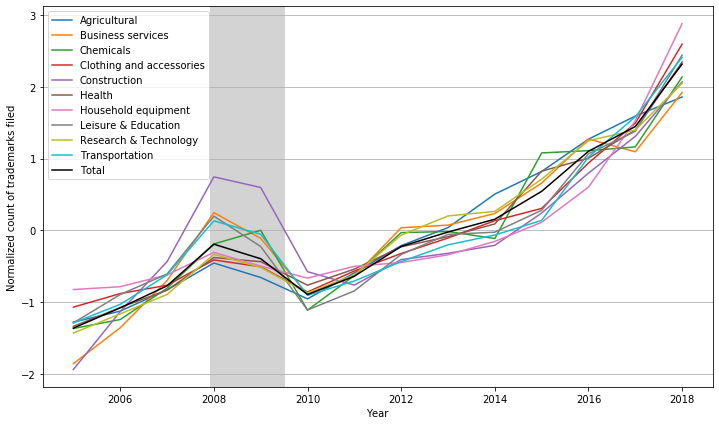

In [9]:
# Define which classes belong to which industry
industries = {'Agricultural':             [29, 30, 31, 32, 33, 43],
              'Business services':        [35, 36],
              'Chemicals':                [1, 2, 4],
              'Clothing and accessories': [14, 18, 22, 23, 24, 25, 26, 27, 34],
              'Construction':             [6, 17, 19, 37, 40],
              'Health':                   [3, 5, 10, 44],
              'Household equipment':      [8, 11, 20, 21],
              'Leisure & Education':      [13, 15, 16, 28, 41],
              'Research & Technology':    [9, 38, 42, 45],
              'Transportation':           [7, 12, 39]}

years = range(2005,2019)
# Plot the different classes
fig = plt.figure(figsize=(12,7))
total = np.zeros(len(years))
for ind, classes in industries.items():
    values = np.zeros(len(years))
    # Loop through all the years
    for i,yr in enumerate(years):
        # Loop over all classes
        for clss in classes:
            # Add the data for this class in this year
            cls_name = f'Class {clss:02d}'
            row = tm_classes.loc[tm_classes['Nice classification'] == cls_name]
            values[i] += row[str(yr-1)]
    total += values

    # Scale and plot the values for this industry
    values = scaler.fit_transform(values.reshape(-1,1))
    plt.plot(years, values, label=ind)

# Scale and plot the normalized total
total = scaler.fit_transform(total.reshape(-1,1))
plt.plot(years, total, label='Total', color='black')

# Add labels
plt.xlabel('Year')
plt.ylabel('Normalized count of trademarks filed')
plt.legend();

# Add recessions
tmh.TmDataTools().plot_recessions(fig.gca())
fig.gca().yaxis.grid()

plt.savefig('../images/trademarks_filed_by_industry.png')

## Observations
* The three tracked market indices track well with one another.
* The up-tick in trademark filing rate correlates more strongly with the up-tick in the markets than with the rate of new business creations.
* Job numbers and trademark filing rates are both good indicators of market optimism.
* The number of newly created businesses seems to drop when the markets decline. Further, the drop in new businesses continues even after the market begins to recover.

Specific industries:
* Construction: Increases more rapidly, but recovers more slowly after the recession caused by the housing crash around 2008.
* Agriculture: Has been growing more slowly than other industries in recent years, possibly in connection with the U.S./China trade war.